# Evaluating classifiers using confusion matrices, ROC curves, and AUC

# Read in our dataset

In [2]:
import pandas as pd

X = pd.read_csv('titanic.X.csv', index_col='PassengerId')
y = pd.read_csv('titanic.y.csv', index_col='PassengerId')

# Create train/test split

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y['Survived'], test_size=0.3)

# Train a classifier

In [16]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', random_state=0)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

# Calculate the confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = clf.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[155,  11],
       [ 18,  84]])

### Rendered with labels

In [18]:
pd.DataFrame(confusion_matrix(y_true, y_pred),
             columns=['Predicted Negative', 'Predicted Positive'],
             index=['True Negative', 'True Positive'])

,Predicted Negative,Predicted Positive
True Negative,155,11
True Positive,18,84


## Calculate the Receiver Operator Characteristic (ROC) curve

### Output probabilities

In [83]:
from sklearn.metrics import roc_curve, auc

clf = SVC(kernel='linear', random_state=0, probability=True)
clf.fit(X_train, y_train)

class_probabilities = clf.predict_proba(X_test)
print class_probabilities.shape
class_probabilities[0:10]

(268, 2)


array([[ 0.81790186,  0.18209814],
       [ 0.80178423,  0.19821577],
       [ 0.38500285,  0.61499715],
       [ 0.81789263,  0.18210737],
       [ 0.80371874,  0.19628126],
       [ 0.13083113,  0.86916887],
       [ 0.35172764,  0.64827236],
       [ 0.83067283,  0.16932717],
       [ 0.965443  ,  0.034557  ],
       [ 0.82072876,  0.17927124]])

### Calculate ROC curve from probabilities

In [70]:
y_probability = class_probabilities[:,1]
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_probability)

## Plot ROC curve

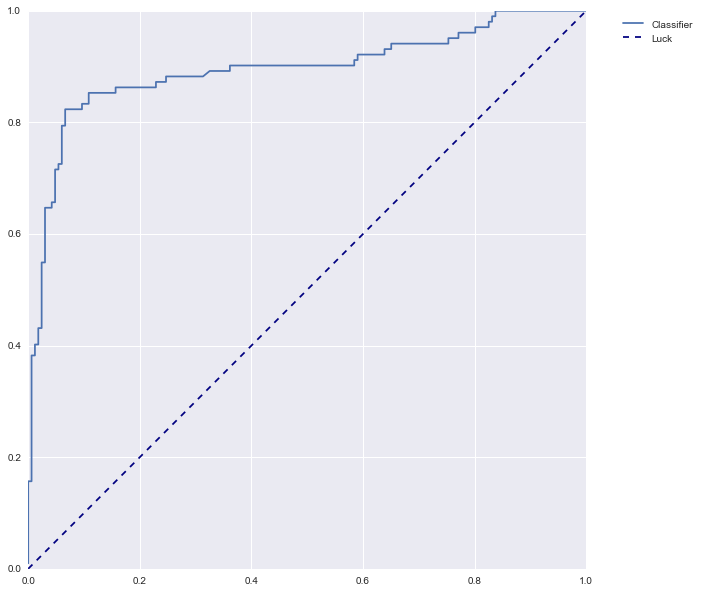

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(10,10))
plt.plot(false_positive_rate, true_positive_rate, label='Classifier')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Luck')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

## Understanding the Luck baseline

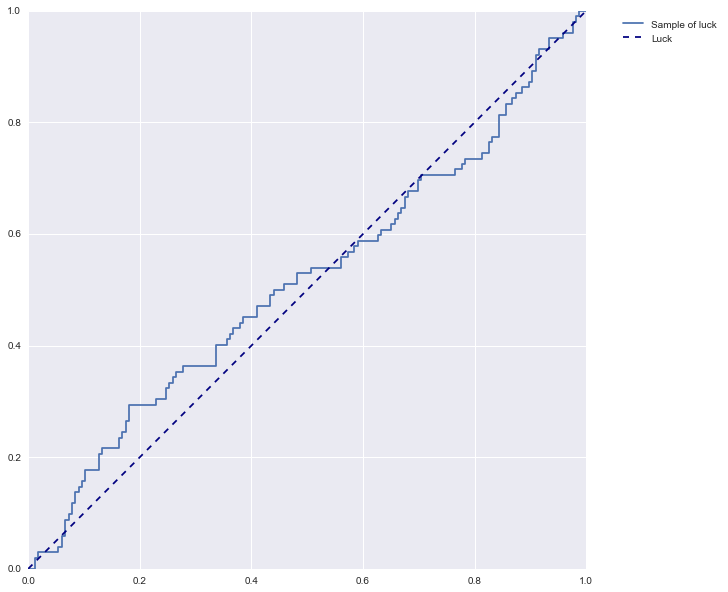

In [80]:
import numpy as np

y_score_random = np.random.rand(len(y_test))
false_positive_rate_random, true_positive_rate_random, _ = roc_curve(y_test, y_score_random)

plt.figure(figsize=(10,10))
plt.plot(false_positive_rate_random, true_positive_rate_random, label='Sample of luck')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Luck')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

## Compare classifiers using ROC curves

### Train multiple classifiers

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

classifiers = [
    AdaBoostClassifier(random_state=0),
    SVC(kernel='linear', random_state=0, probability=True),
    RandomForestClassifier(random_state=0),
    KNeighborsClassifier()
]

for clf in classifiers:
    clf.fit(X_train, y_train)

### Plot ROC curves

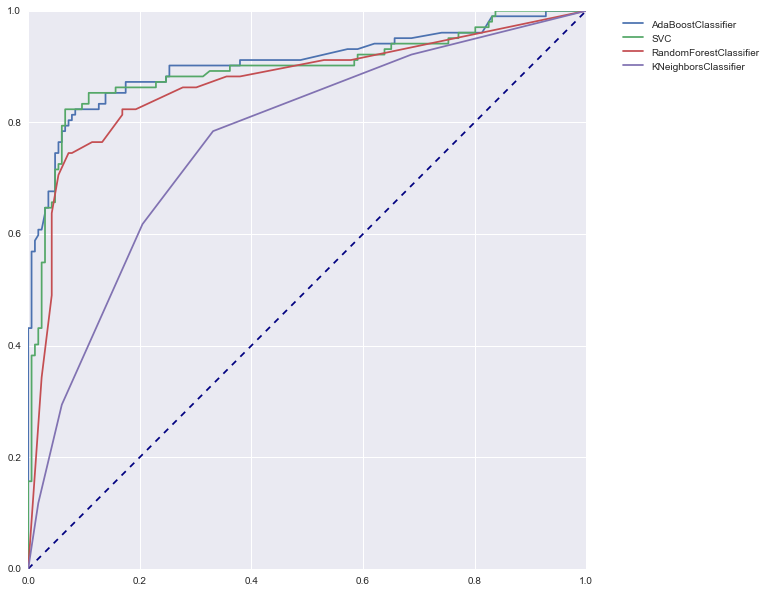

In [66]:
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
for clf in classifiers:
    y_score = clf.predict_proba(X_test)[:,1]
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_score)
    plt.plot(false_positive_rate, true_positive_rate,
             label= clf.__class__.__name__)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

## Calculate Area Under the Curve metrics

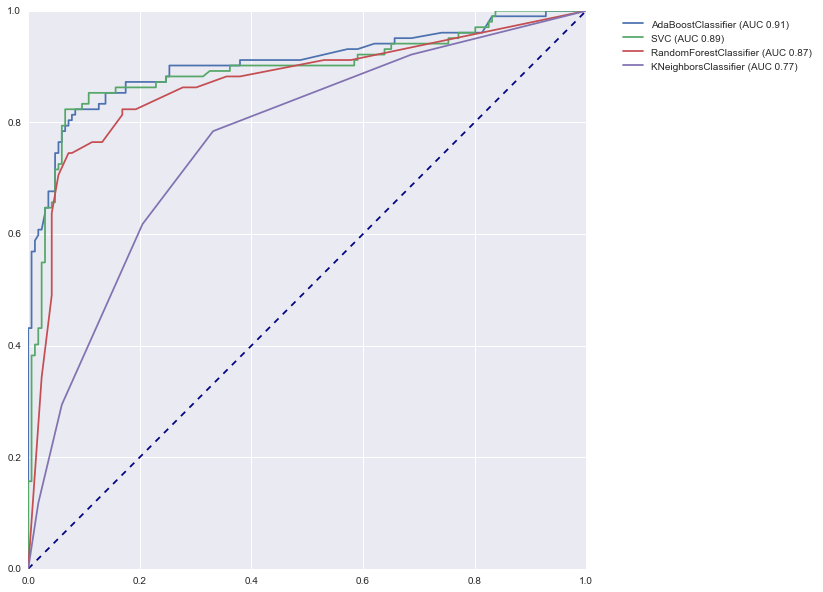

In [65]:
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
for clf in classifiers:
    y_score = clf.predict_proba(X_test)[:,1]
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_score)
    area_under_the_curve = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,
             label='%s (AUC %0.2f)' % (clf.__class__.__name__,area_under_the_curve))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)